# Section 5: Optimal Model Selection
### Lecture 17: Threshold Optimization using Performance Metrics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb

df = pd.read_csv('credit_card.csv')
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
model_xgb = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28429,     3],
       [    6,    43]], dtype=int64)

In [2]:
# probability of being fraudulent
y_pred = model_xgb.predict_proba(X_test)[:,1]
y_pred

array([1.0238165e-05, 1.4227397e-05, 5.2480987e-06, ..., 2.7707663e-06,
       1.6304925e-06, 8.0974127e-07], dtype=float32)

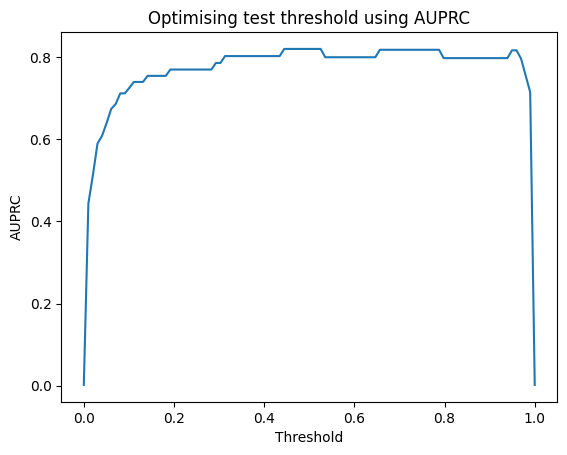

In [3]:
import numpy as np
from sklearn.metrics import average_precision_score

threshold_list = []
auprc_list = []
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    y_pred_thresh = [1 if e > threshold else 0 for e in y_pred]
    threshold_list.append(threshold)
    
    # AUPRC
    auprc_score = average_precision_score(y_test, y_pred_thresh)
    auprc_list.append(auprc_score)

# plot curve
threshold_df = pd.DataFrame(threshold_list, auprc_list).reset_index()
threshold_df.columns = ['AUPRC', 'Threshold']

plt.plot(threshold_df['Threshold'], threshold_df['AUPRC'])
plt.title("Optimising test threshold using AUPRC")
plt.xlabel('Threshold')
plt.ylabel('AUPRC')
plt.savefig('Optimising threshold using AUPRC');
plt.show()

In [4]:
threshold_df.sort_values(by='AUPRC', ascending=False)

,AUPRC,Threshold
50,0.820530,0.505051
44,0.820530,0.444444
52,0.820530,0.525253
51,0.820530,0.515152
48,0.820530,0.484848
...,...,...
3,0.589815,0.030303
2,0.513295,0.020202
1,0.444110,0.010101
0,0.001720,0.000000


In [5]:
threshold_df.loc[(threshold_df['AUPRC'] >= 0.82)]

,AUPRC,Threshold
44,0.82053,0.444444
45,0.82053,0.454545
46,0.82053,0.464646
47,0.82053,0.474747
48,0.82053,0.484848
49,0.82053,0.494949
50,0.82053,0.505051
51,0.82053,0.515152
52,0.82053,0.525253
